In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/distilbert_en_uncased_preprocess/2")
bert_encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/distilbert_en_uncased_L-6_H-768_A-12/1")

In [ ]:
import pandas as pd
import numpy as np 
import nltk
import tensorflow as tf
df3=pd.read_csv("final_tweets.csv",parse_dates = True)
df3.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,target,hashtags,actual_time
0,725,Ramvignesh490,NaN,Chennai,461,137,100993,106,Thousands of people throng the Chennai Metro R...,0,[],2021-12-31 10:33:09+00:00
1,427,ManickamJebason,NaN,NaN,571,344,35084,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2021-12-31 09:18:18+00:00
2,542,nousha1212,"தமிழன்...|born to express,not impress\n|",NaN,567,88,7994,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2021-12-31 07:55:52+00:00
3,375,chinnapper_aj,NaN,NaN,459,362,2448,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2021-12-31 10:27:34+00:00
4,168,VMeenakshiSun13,NaN,NaN,129,0,70,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2022-01-01 05:29:50+00:00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split((df3['text']),df3['target'],train_size=0.8,test_size=0.2,random_state=True)

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text-layer')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
d_layer = tf.keras.layers.Dropout(0.1, name="dropout-layer")(outputs['pooled_output'])
d_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(d_layer)
model = tf.keras.Model(inputs=[text_input], outputs = [d_layer])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text-layer (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text-layer[0][0]']             
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                      
                                                                                                  
 keras_layer_1 (KerasLayer)     {'encoder_outputs':  66362880    ['keras_layer[0][0]',        

In [ ]:
m= [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=m)

In [ ]:
model.fit(X_train, y_train,epochs=100)

Epoch 1/100
20/20 [==============================] - 7s 370ms/step - loss: 0.0685 - accuracy: 0.9797 - precision: 0.9831 - recall: 0.9924
Epoch 2/100
20/20 [==============================] - 7s 369ms/step - loss: 0.0692 - accuracy: 0.9766 - precision: 0.9795 - recall: 0.9924
Epoch 3/100
20/20 [==============================] - 7s 372ms/step - loss: 0.0684 - accuracy: 0.9844 - precision: 0.9850 - recall: 0.9962
Epoch 4/100
20/20 [==============================] - 7s 374ms/step - loss: 0.0627 - accuracy: 0.9875 - precision: 0.9887 - recall: 0.9962
Epoch 5/100
20/20 [==============================] - 7s 371ms/step - loss: 0.0635 - accuracy: 0.9844 - precision: 0.9869 - recall: 0.9943
Epoch 6/100
20/20 [==============================] - 7s 369ms/step - loss: 0.0641 - accuracy: 0.9859 - precision: 0.9869 - recall: 0.9962
Epoch 7/100
20/20 [==============================] - 7s 370ms/step - loss: 0.0650 - accuracy: 0.9766 - precision: 0.9795 - recall: 0.9924
Epoch 8/100
20/20 [===============

In [ ]:
import numpy as np
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[ 27,   1],
       [  2, 130]])

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.99      0.98      0.99       132

    accuracy                           0.98       160
   macro avg       0.96      0.97      0.97       160
weighted avg       0.98      0.98      0.98       160



In [ ]:
t = ['chennai drowning red alert floods','i am student']
model.predict(t)

array([[0.9159733 ],
       [0.16003874]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 27,   1],
       [  2, 130]])

Text(33.0, 0.5, 'Truth')

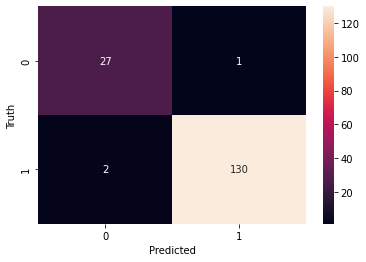

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
df3['date'] = pd.to_datetime(df3['actual_time']).dt.date
df3['time'] = pd.to_datetime(df3['actual_time']).dt.time
df3.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,target,hashtags,actual_time,date,time
0,725,Ramvignesh490,NaN,Chennai,461,137,100993,106,Thousands of people throng the Chennai Metro R...,0,[],2021-12-31 10:33:09+00:00,2021-12-31,10:33:09
1,427,ManickamJebason,NaN,NaN,571,344,35084,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2021-12-31 09:18:18+00:00,2021-12-31,09:18:18
2,542,nousha1212,"தமிழன்...|born to express,not impress\n|",NaN,567,88,7994,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2021-12-31 07:55:52+00:00,2021-12-31,07:55:52
3,375,chinnapper_aj,NaN,NaN,459,362,2448,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2021-12-31 10:27:34+00:00,2021-12-31,10:27:34
4,168,VMeenakshiSun13,NaN,NaN,129,0,70,605,"If it floods everytime it rains, Then the rain...",1,['Chennai'],2022-01-01 05:29:50+00:00,2022-01-01,05:29:50


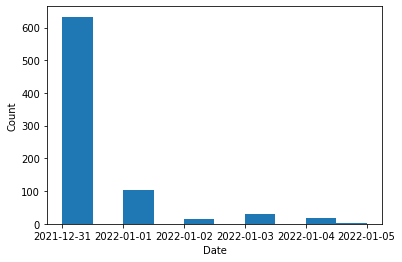

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df3['date'])
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()